In [311]:
"""
    Assignment 7
        Class: Intro to Data Analysis (CS6850)
        Instructor: Dr. Hamid Karimi
        Date: April 1, 2024
        Student: Paul Semadeni
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, cluster
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import tree, linear_model

In [295]:
with open("./files/train_office.csv", "r") as file:
    train_office_df = pd.read_csv(file)

train_office_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [296]:
# Convert datetime into if the datetime lands within business hours. Assuming business hours are 7 am to 6 pm
train_office_df["date_time"] = train_office_df["date"].str.split(" ", n=1, expand=True)[1]
train_office_df["business_hours"] = (train_office_df["date_time"].str.split(":", n=1, expand=True)[0].astype(int) >= 7) & (train_office_df["date_time"].str.split(":", n=1, expand=True)[0].astype(int) < 18)
train_office_df["business_hours"] = train_office_df["business_hours"].astype(int)
train_office_df = train_office_df.drop(columns=["date_time", "date"])
print(train_office_df.head())

   Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy  \
0        23.18   27.2720  426.0  721.25       0.004793          1   
1        23.15   27.2675  429.5  714.00       0.004783          1   
2        23.15   27.2450  426.0  713.50       0.004779          1   
3        23.15   27.2000  426.0  708.25       0.004772          1   
4        23.10   27.2000  426.0  704.50       0.004757          1   

   business_hours  
0               1  
1               1  
2               1  
3               1  
4               1  


In [297]:
def confusion_matrix_calculations(conf_mat):
    tp = conf_mat[1][1]
    tn = conf_mat[0][0]
    fp = conf_mat[0][1]
    fn = conf_mat[1][0]
    # Precision
    precision = tp / (tp + fp)
    # Recall
    recall = tp / (tp + fn)
    # F1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    results = [precision, recall, f1]
    print("\nprecision:", results[0], "\nrecall:", results[1], "\nf1-score:", results[2])

In [298]:
Y = train_office_df["Occupancy"]
X = train_office_df.drop("Occupancy", axis=1)

Depth: 1
[0.95714286 0.98910824 0.93737236 0.99931926 0.99455412] Average: 0.9754993678887484
Depth: 5
[0.9585034  0.95371001 0.86861811 0.9632403  0.91218516] Average: 0.9312513950440625
Depth: 10
[0.9585034  0.95371001 0.81552076 0.96868618 0.91218516] Average: 0.921721102327929
Depth: 50
[0.95714286 0.95371001 0.81552076 0.98025868 0.91218516] Average: 0.9237634931440241
Depth: 100
[0.95714286 0.95371001 0.80258679 0.97889721 0.91218516] Average: 0.920904405329184


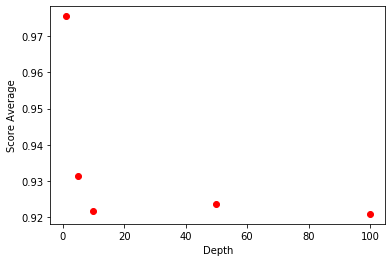

In [299]:
# TODO: (a)	Train the following classifiers (using 5-fold cross-validation) on the train  office.csv file and calculate the average accuracy of the cross-validation for each method given below. Vary the hyperparameters of the classifier and draw a plot that shows the average cross-validation accuracy versus hyperparameter values for each classification method shown below: i.	Decision tree (DT) (maxdepth = 1, 5, 10, 50, 100)
def decision_tree(depths, X, Y, columns=[], actual=False, plot_tree=False):
    for depth in depths:
        print("Depth:", depth)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf.fit(X,Y)
        if not actual:
            scores = cross_val_score(clf, X, Y, cv=5)
            avg_score = sum(scores)/len(scores)
            print(scores, "Average:", avg_score)
            plt.plot(depth ,avg_score, "ro-")
            plt.xlabel("Depth")
            plt.ylabel("Score Average")

        if plot_tree:
            fig = plt.figure(figsize=(25,20))
            decision_tree = tree.plot_tree(clf, feature_names=columns, class_names=columns, filled=True)
            fig.show()

        if actual:
            Y_pred = clf.predict(X_test)
            Y_prob = clf.predict_proba(X_test)
            conf_mat = confusion_matrix(Y_test, Y_pred)
            print(conf_mat)
            confusion_matrix_calculations(conf_mat)
            return Y_test, Y_prob

depths = [1, 5, 10, 50, 100]
decision_tree(depths, X, Y)


[0.95918367 0.97957794 0.77467665 0.99863853 0.97140912] Average: 0.9366971839791056
[0.95918367 0.96664398 0.82505106 0.99727706 0.97208986] Average: 0.9440491240744086
[0.95918367 0.97957794 0.80871341 0.99931926 0.97140912] Average: 0.9436406829580027
[0.95918367 0.97549353 0.82164738 0.99863853 0.97208986] Average: 0.9454105944624276
[0.9585034  0.98093941 0.83117767 0.99863853 0.97072839] Average: 0.947997480816697
[0.9585034  0.97889721 0.85023826 0.99931926 0.96936692] Average: 0.9512650097479428
[0.9585034  0.98706603 0.8917631  0.99931926 0.97072839] Average: 0.9614760376580858


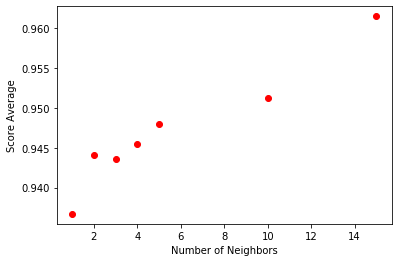

In [300]:
# TODO: ii. K-nearest neighbor (KNN) (k = 1, 2, 3, 4, 5, 10, 15)
def knn(num_neighbors, X, Y, actual=False, conf_mat_calc=True):
    accuracy = list()

    for n in num_neighbors:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X,Y)
        if not actual:
            scores = cross_val_score(clf, X, Y, cv=5)
            avg_score = sum(scores)/len(scores)
            print(scores, "Average:", avg_score)
            plt.plot(n ,avg_score, "ro-")
            plt.xlabel("Number of Neighbors")
            plt.ylabel("Score Average")
        if actual:
            Y_pred = clf.predict(X_test)
            Y_prob = clf.predict_proba(X_test)
            conf_mat = confusion_matrix(Y_test, Y_pred)
            print(conf_mat)
            if conf_mat_calc:
                confusion_matrix_calculations(conf_mat)
            return Y_test, Y_prob

num_neighbors = [1, 2, 3, 4, 5, 10, 15]
knn(num_neighbors, X, Y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9585034  0.98502383 0.99659632 0.99931926 0.98434309] Average: 0.9847571812932117
[0.9585034  0.98910824 0.99659632 0.99931926 0.97617427] Average: 0.9839402990604003
[0.9585034  0.98910824 0.99659632 0.99931926 0.98366236] Average: 0.9854379164872211


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9537415  0.98910824 0.99659632 0.99931926 0.9632403 ] Average: 0.980401124370783


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

[0.9537415  0.98910824 0.99659632 0.99931926 0.96664398] Average: 0.9810818595647925


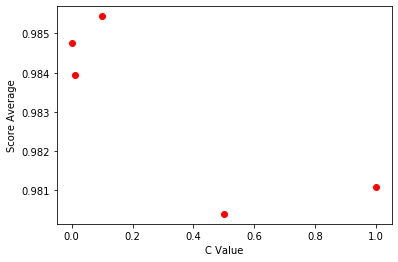

In [301]:
# TODO: iii. Logistic regression (LR) (C = 0.001, 0.01, 0.1, 0.5, 1)
def log_reg(c_values, X, Y, actual=False):
    for c in c_values:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
        clf = linear_model.LogisticRegression(C=c)
        clf.fit(X,Y)
        if not actual:
            scores = cross_val_score(clf, X, Y, cv=5)
            avg_score = sum(scores)/len(scores)
            print(scores, "Average:", avg_score)
            plt.plot(c ,avg_score, "ro-")
            plt.xlabel("C Value")
            plt.ylabel("Score Average")
        if actual:
            Y_pred = clf.predict(X_test)
            Y_prob = clf.predict_proba(X_test)
            conf_mat = confusion_matrix(Y_test, Y_pred)
            print(conf_mat)
            confusion_matrix_calculations(conf_mat)
            return Y_test, Y_prob

c_values = [0.001, 0.01, 0.1, 0.5, 1]
log_reg(c_values, X, Y)

In [302]:
# TODO: train a model on the entire train office.csv
decision_y_test, decision_y_prob = decision_tree([5], X, Y, train_office_df.columns, True)

Depth: 5
[[4596   17]
 [  10 1254]]

precision: 0.9866247049567269 
recall: 0.9920886075949367 
f1-score: 0.9893491124260354


In [303]:
knn_y_test, knn_y_prob = knn([15], X, Y, True)

[[4543   70]
 [   4 1260]]

precision: 0.9473684210526315 
recall: 0.9968354430379747 
f1-score: 0.9714726291441789


In [304]:
log_y_test, log_y_prob = log_reg([0.01], X, Y, True)

[[4542   71]
 [   5 1259]]

precision: 0.9466165413533835 
recall: 0.9960443037974683 
f1-score: 0.9707016191210486


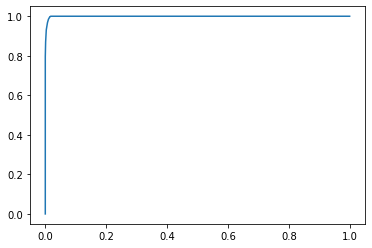

In [305]:
# TODO: Draw ROC curves of the three classifiers in one graph. In the legend of the graph, include AUCs (area under the curve), e.g., DT (AUC=X), KNN (AUC=X), LR (AUC=X).
true_labels = (knn_y_test == 1)
fpr, tpr, thresholds = roc_curve(true_labels, knn_y_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

Depth: 5
[0.9585034  0.95507148 0.89857046 0.97004765 0.91218516] Average: 0.9388756292169692


<ipython-input-299-a7d31a0436b1>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


TypeError: cannot unpack non-iterable NoneType object

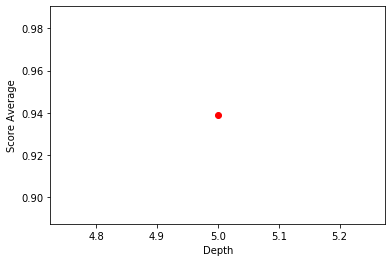

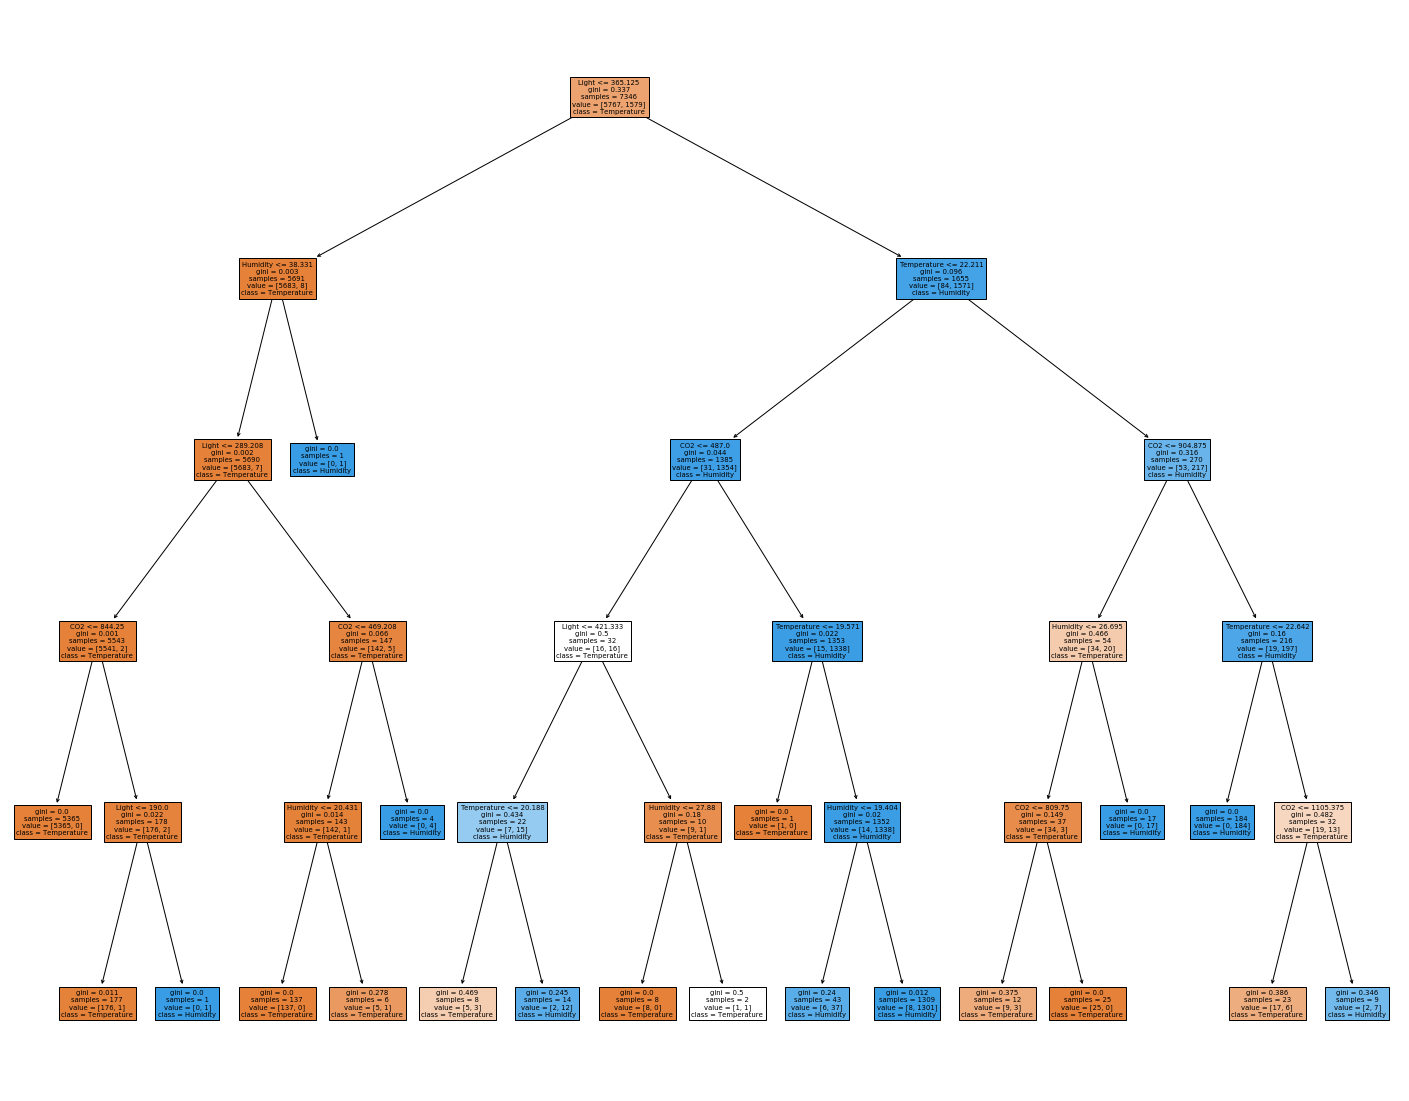

In [306]:
# TODO: Visualize (plot) the resulting decision tree You need to use tree class from sklearn
decision_y_test, decision_y_prob = decision_tree([5],  X, Y, train_office_df.columns, plot_tree=True)


In [312]:
# TODO: apply the K-means clustering algorithm on highway ramp traffic data. Load Data
with open("./files/traffic.csv", "r") as file:
    traffic_df = pd.read_csv(file)

print(traffic_df)

          date  0:00  0:05  0:10  0:15  0:20  0:25  0:30  0:35  0:40  ...  \
0    4/10/2005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1    4/11/2005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2    4/12/2005   3.0   8.0  10.0   6.0   1.0   4.0   9.0   4.0   6.0  ...   
3    4/13/2005   6.0   5.0   4.0   4.0   4.0   4.0   4.0   2.0  12.0  ...   
4    4/14/2005   7.0   3.0   6.0  11.0   8.0   6.0   6.0  10.0   4.0  ...   
..         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
170  9/27/2005   8.0   7.0  10.0   7.0   9.0   4.0   2.0   5.0   4.0  ...   
171  9/28/2005  14.0  10.0   9.0  14.0   8.0  15.0  11.0   7.0   3.0  ...   
172  9/29/2005  10.0   5.0   8.0   1.0   3.0   7.0   1.0   6.0   6.0  ...   
173  9/30/2005   7.0   6.0   7.0  12.0   9.0  12.0  11.0  13.0   6.0  ...   
174  10/1/2005  13.0  13.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     23:15  23:20  23:25  23:30  23:35  23:40  23:45  23:50  23:55      cla

In [313]:
traffic_df["class"].value_counts()

class
none         94
evening      58
afternoon    23
Name: count, dtype: int64

In [314]:
# TODO: Remove date column
traffic_df = traffic_df.drop(columns=["date"])
Y = traffic_df["class"]
traffic_df = traffic_df.drop(columns=["class"])
edit_y = {"none": 0, "afternoon": 1, "evening": 2}
Y = Y.replace(edit_y)
columns = traffic_df.columns
traffic_df = traffic_df[columns].fillna(0)
Y.head()
traffic_df.head()

,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,0:40,0:45,...,23:10,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,23:55
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,6.0,8.0,11.0,7.0,2.0,3.0,6.0,8.0
2,3.0,8.0,10.0,6.0,1.0,4.0,9.0,4.0,6.0,13.0,...,10.0,4.0,10.0,2.0,6.0,5.0,4.0,5.0,6.0,7.0
3,6.0,5.0,4.0,4.0,4.0,4.0,4.0,2.0,12.0,2.0,...,7.0,7.0,15.0,10.0,4.0,10.0,6.0,10.0,6.0,16.0
4,7.0,3.0,6.0,11.0,8.0,6.0,6.0,10.0,4.0,7.0,...,12.0,5.0,9.0,4.0,4.0,6.0,9.0,5.0,16.0,8.0


In [315]:
# TODO: Apply K-means clustering with the number of clusters set to 3.
y_test, y_prob = knn([3], traffic_df, Y, actual=True, conf_mat_calc=False)

[[76  0  0]
 [ 7 13  0]
 [ 4  0 40]]


In [316]:
print(cluster.adjusted_rand_score(Y, traffic_df))

ValueError: labels_pred must be 1D: shape is (175, 288)